# What is quantum entanglement?
> OK, and so what?

- toc: true 
- badges: true
- comments: true
- categories: [quantum concepts]
- image: images/chart-preview.png

# Entanglement is the failure of states to factorize

I've known this formal definition of entanglement for years, but I am only appreciating many of its implications now. In this post I would like to share two aspects of it, but first for the formal definition.

So what is entanglement? Entanglement is what entangled states have. What are those? Take two spins. The state 

\begin{equation}
\frac1{\sqrt{2}}\Big(|\uparrow\uparrow\rangle+|\downarrow\downarrow\rangle\Big) \label{bell}
\end{equation}
is your canonical example of an entangled stated. In contrast, all the states below are *unentangled* 
\begin{align}
|\uparrow\uparrow\rangle,\qquad |\downarrow\uparrow\rangle,\qquad \frac1{\sqrt{2}}|\uparrow\rangle\Big(\uparrow\rangle-|\downarrow\rangle\Big),\qquad \frac1{\sqrt{2}}\Big(|\uparrow\rangle-|\downarrow\rangle\Big)\Big(\uparrow\rangle+|\downarrow\rangle\Big) \label{unen} 
\end{align}

The difference between \eqref{bell} and \eqref{unen} is the following. All latter states are actually *products* of the form $|\psi_1\rangle |\psi_2\rangle$ where $|\psi_1\rangle$ is the state of the first system and $|\psi_2\rangle$. In contrast, state \eqref{bell} *can not* be represented in as a product. It is instead a linear combination of factorized states which is not reducible to single product. You can *define* entangled states by this property of not being factorizible into wavefunctions of consistuent spins.

Now that we know what entangled states are it is perfectly reasonable to ask "So what"? Why are entangled states special? Why are they inherently quantum? I am going to give two angles on this questions, out of many possible.

## Entangled spin behaves very differently from unentangled
A spin which is not entangled can always be described by a direction $\bf n$ along which it is pointing $|\uparrow_{\bf n}\rangle$.  If one measures the component of the spin along this direction, the result is always $\frac12$. Such a measurement corresponds to a projector $P({\bf n})={\bf n}\cdot {\bf \sigma}=n_x \sigma_x+n_y\sigma_y+n_z\sigma_z$. If state $|\uparrow_{\bf n}\rangle$ is measured along a different axis $\bf n'$ the result depends on the angle $\theta$ between $\bf n$ and $\bf n'$. With probability $\cos^2\frac\theta2$ one gets projection $+\frac12$ and with probability $\sin^2\frac\theta2$ one gets $-\frac12$. However, for *any* state of the spin $|\psi\rangle$ there is an axis $\bf n$, such that measuring the spin along this axis gives $\frac12$ with probability one.

This is also true for any of the unentangled states \eqref{unen}. For example, measuring the projection of the first spin in the state $|\uparrow\uparrow\rangle\equiv |\uparrow_{\bf z}\uparrow_{\bf z}\rangle$ along $\bf z$ always gives $+\frac12$. As another example, since 
\begin{align}
|\downarrow_{\bf x}\rangle=\frac12\Big(|\uparrow_{\bf z}\rangle-|\downarrow_{\bf z}\rangle\Big) \label{xdown}
\end{align}
the state $\frac1{\sqrt{2}}\Big(|\uparrow\rangle-|\downarrow\rangle\Big)\Big(\uparrow\rangle+|\downarrow\rangle\Big)$ always registers $-\frac12$ when the projection of the first spin along $\bf x$ axis is measured.

In contrast, for the maximally entangled state \eqref{bell} the axis with a definite projection of the first spin **does not exist**. In fact, for all intents and purposes if you only look at observables associated with the first qubit, state \eqref{bell} behaves as a statistical ensemble of states $|\uparrow\rangle$ and $|\downarrow\rangle$, i.e.

\begin{align}
\frac1{\sqrt{2}}\Big(|\uparrow\uparrow\rangle+|\downarrow\downarrow\rangle\Big)\approx \cases{|\uparrow\rangle \text{ with probability $\frac12$}\\ |\downarrow\rangle \text{ with probability $\frac12$}} \label{bellapprox}
\end{align}

This means, for example, that projection onto $\bf z$ axis of the first spin is *completely* random: with probability $\frac12$ it behaves as $|\uparrow\rangle$ and gives projection $+\frac12$, with probability $\frac12$ it behaves as $|\downarrow\rangle$ and gives projection $-\frac12$. This is different from a coherent superposition of the up and down states, such as \eqref{xdown}. Although state \eqref{xdown} gives random results when measured along $\bf z$, it gives certain results when measured along $\bf x$. There is not such axis for state \eqref{bellapprox}. Although I do not prove it here, in fact the spin projection along *any* axis is completely random. 


To prove this fact I would need to go into some details of how one does construct an ensemble from an entangled state. This is not at all difficult but I won't do it here. I encourage an interested reader to consult John Preskill's notes ([chapter 2.3](http://www.theory.caltech.edu/~preskill/ph219/chap2_15.pdf)).

Instead, let me do a quick experimental check using `qiskit`. A Hadamard gate followed by a CNOT creates a bell state of two qubits.

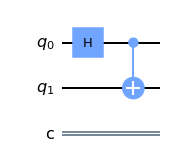

In [27]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 1)
qc.h(0)
qc.cx(0, 1)
qc.draw(output='mpl')

To my knowledge, one can only measure in the computational basis in `qiskit`, so get the spin projection along some axis we need first to rotate the spin and then measure. 

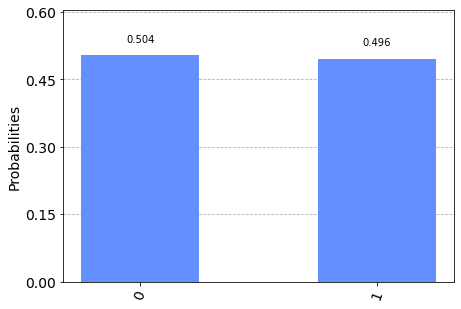

In [28]:
# Feel free to change these parameters and see if the outcome distribution changes.
theta, pi, lam = 0.13, 0.99, 0.37 

qc.u(theta, pi, lam, 0)
qc.measure(0, 0)

# Execute on a simulator and plot a histogram of the result.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

# Entanglement correlations are stronger than classical

First let me note that although we talked about the first spin before, the state \eqref{bell} is symmetric and everything equally applies to the second spin. Although the behavior of each of these spins is completely random, there are strong correlations among the them. If we can make measurments on both spins the state \eqref{bell} behaves as

\begin{align}
\frac1{\sqrt{2}}\Big(|\uparrow\uparrow\rangle+|\downarrow\downarrow\rangle\Big)\approx \cases{|\uparrow\uparrow\rangle \text{ with probability $\frac12$}\\ |\downarrow\downarrow\rangle \text{ with probability $\frac12$}} \label{bellapprox2}
\end{align}

So for example projections onto $\bf z$ axis of both spins are *always* the same, although random. Again, this in fact holds for *any* axis. Here is an experimental verification


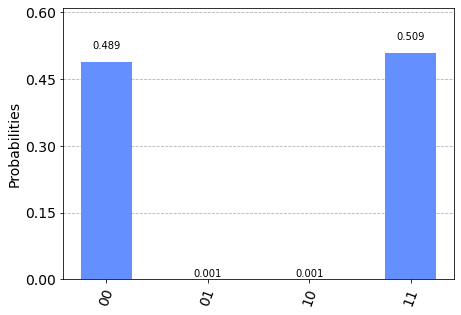

In [35]:
# Building Bell's state.
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Rotation of each qubit to simulate measurement along arbitary axis.
theta, pi, lam = 0.13, 0.99, 0.37 

qc.u(theta, pi, lam, 0)
qc.u(theta, pi, lam, 1)
qc.measure([0, 1], [0, 1])

# Simulate and plot results.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

When seeing this for the first time there is definitely something to contemplate, like say an [EPR paradox](https://en.wikipedia.org/wiki/EPR_paradox#:~:text=The%20Einstein%E2%80%93Podolsky%E2%80%93Rosen%20paradox,by%20quantum%20mechanics%20was%20incomplete.). I will discuss just one manifestation of these quantum correlation that I became aware of recently, and which has a very concrete operational interpretation -- it allows you play a certain probabilistic game better than any classical team could!

So here is the setup. Alice and Bob are playing together against Charlie. Charlie sends random uncorrelated bits $a$ to Alice and $b$ to Bob. Admittedly, the Charlie's job is not very creative. Now, in response to the obtained bits Alice produces her output bit $a'$ and Bob his $b'$. Team A&B wins if $a'\oplus b'=a\land b$ where $\oplus$ is sum modulo 2 and $\land$ is the logical AND. Explicitly, if both Alice and Bob get $a=b=1$, which happens one quarter of the time, they win iff they respond $a'=0, b'=1$ or $a'=1, b'=0$. For all other inputs from Charlie, i.e. when $(a,b)$ is equal to $(0,0), (1,0)$ or $(0,1)$ they win iff $a'=0,b'=0$ or $a'=1, b'=1$.

Though on the same team, they can not communicate during the game. But they can discuss their strategy in advance. Cha



### Notes:
- I talk about spins because they come with the useful geometrical intuition. The discussion applies equally to any type of qubit though.
- Maximally entangled